In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
emlak = pd.read_csv('train.csv')
emlak.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
emlak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
emlak=emlak.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1)
emlak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [5]:
emlak.dropna(inplace=True)

In [6]:
emlak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non

In [7]:
emlak.isnull().sum()*100/emlak.shape[0]

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [8]:
emlak.nunique()

Id               1094
MSSubClass         15
MSZoning            5
LotFrontage       107
LotArea           806
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          6
BldgType            5
HouseStyle          8
OverallQual         9
OverallCond         8
YearBuilt         109
YearRemodAdd       61
RoofStyle           5
RoofMatl            7
Exterior1st        14
Exterior2nd        16
MasVnrType          4
MasVnrArea        279
ExterQual           4
ExterCond           4
Foundation          5
BsmtQual            4
                 ... 
BsmtFullBath        3
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        7
KitchenAbvGr        3
KitchenQual         4
TotRmsAbvGrd       10
Functional          6
Fireplaces          4
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          4
GarageArea

In [9]:
listsurekli=list()
listkategorik=list()
for i in range(76):
    if (emlak.nunique()[i]>=10):
        listsurekli.append(emlak.nunique().index[i])
    else:
        listkategorik.append(emlak.nunique().index[i])

In [10]:
listsurekli

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'Neighborhood',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [11]:
listkategorik

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolArea',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [12]:
listesurekli=pd.DataFrame()
listekategorik=pd.DataFrame()
for a in listsurekli:
    listesurekli[a]=emlak[a]
for b in listkategorik:
    listekategorik[b]=emlak[b]    

In [13]:
listesurekli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 29 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Neighborhood     1094 non-null object
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
Exterior1st      1094 non-null object
Exterior2nd      1094 non-null object
MasVnrArea       1094 non-null float64
BsmtFinSF1       1094 non-null int64
BsmtFinSF2       1094 non-null int64
BsmtUnfSF        1094 non-null int64
TotalBsmtSF      1094 non-null int64
1stFlrSF         1094 non-null int64
2ndFlrSF         1094 non-null int64
LowQualFinSF     1094 non-null int64
GrLivArea        1094 non-null int64
TotRmsAbvGrd     1094 non-null int64
GarageYrBlt      1094 non-null float64
GarageArea       1094 non-null int64
WoodDeckSF       1094 non-null int64
OpenPorchSF      1094 non-null int64
EnclosedPorch    1094 non-null in

In [14]:
listesurekli=listesurekli.drop(['Neighborhood','Exterior1st','Exterior2nd'],axis=1)

In [15]:
listekategorik['Neighborhood']=emlak['Neighborhood']
listekategorik['Exterior1st']=emlak['Exterior1st']
listekategorik['Exterior2nd']=emlak['Exterior2nd']

## Sürekli de özellik mühendisliği için;

In [16]:
listesurekli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 26 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
MasVnrArea       1094 non-null float64
BsmtFinSF1       1094 non-null int64
BsmtFinSF2       1094 non-null int64
BsmtUnfSF        1094 non-null int64
TotalBsmtSF      1094 non-null int64
1stFlrSF         1094 non-null int64
2ndFlrSF         1094 non-null int64
LowQualFinSF     1094 non-null int64
GrLivArea        1094 non-null int64
TotRmsAbvGrd     1094 non-null int64
GarageYrBlt      1094 non-null float64
GarageArea       1094 non-null int64
WoodDeckSF       1094 non-null int64
OpenPorchSF      1094 non-null int64
EnclosedPorch    1094 non-null int64
3SsnPorch        1094 non-null int64
ScreenPorch      1094 non-null int64
MiscVal          1094 non-null int64

In [17]:
def datauret(attribute,emlak):
    y0 = emlak[attribute]
    trace0 = go.Box(
        y=y0,
        name = attribute,
        )
    return trace0

In [18]:
data_surekli=list()
rate=listesurekli
for i in range(len(rate.columns)):
    data_surekli.append(datauret(rate.columns[i],emlak))


In [19]:
def visibleTF(number):
    liste=list()
    for i in range(len(data_surekli)):
        liste.append(False)
    liste[number]=True
    return liste

In [20]:
def button(attribute,number):
    return dict(label = attribute,method = 'update',args = [{'visible': visibleTF(number)},{'title': 'Attrition ilişkisi'}])

In [21]:
layout = go.Layout(
    #barmode='box',
    width=800,
    height=500,
    autosize=False,
    #margin=dict(t=0, b=0, l=0, r=0),
    title='Attrition-Sürekli Özellik Box Grafiği',
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            #text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            #text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
rate=listesurekli
updatemenus = list([dict(active=-1,buttons=[button(rate.columns[i],i) for i in range(len(rate.columns))])])

In [22]:
layout['updatemenus']=updatemenus
fig = dict(data=data_surekli, layout=layout)
py.iplot(fig, filename='a')

In [23]:
from scipy.stats.mstats import winsorize
def datauret(attribute,emlak):
    
    y0 = emlak[attribute]
    #y1 = np.log(emlak[attribute])
    y1 = winsorize(emlak[attribute], (0, 0.05))
    #log=attribute+'_log'
    wins=attribute+'_wins'
    #emlak[log]=np.log(emlak[attribute])
    emlak[wins]=winsorize(emlak[attribute], (0, 0.05))
    
    trace = go.Box(
        y=y0,
        name = attribute,
        marker = dict(
            color = 'rgb(214, 12, 140)',
        )
    )
    trace1 = go.Box(
        y=y1,
        name = attribute+'_log',
        marker = dict(
            color = 'rgb(0, 128, 128)',
        )
    )
    trace2 = go.Box(
        y=y0,
        name = attribute+'_winsorize',
        boxpoints = False,
        marker = dict(
            color = 'rgb(214, 12, 0)',
        )
    )

    data = [trace, trace1]
    return data

In [24]:

data_surekli=list()
rate=listesurekli[['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                  '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                  'ScreenPorch','MiscVal','SalePrice']]
for i in range(len(rate.columns)):
    for j in range(2):
        data_surekli.append(datauret(rate.columns[i],emlak)[j])
        

In [25]:
from plotly import tools
fig = tools.make_subplots(rows=21, cols=2)

for i in range(21*2):
    if(i<2):
        fig.append_trace(data_surekli[i], 1, i+1)
    elif(i<4):
        fig.append_trace(data_surekli[i], 2, i-1)
    elif(i<6):
        fig.append_trace(data_surekli[i], 3, i-3)
    elif(i<8):
        fig.append_trace(data_surekli[i], 4, i-5)
    elif(i<10):
        fig.append_trace(data_surekli[i], 5, i-7)
    elif(i<12):
        fig.append_trace(data_surekli[i], 6, i-9)
    elif(i<14):
        fig.append_trace(data_surekli[i], 7, i-11)
    elif(i<16):
        fig.append_trace(data_surekli[i], 8, i-13)
    elif(i<18):
        fig.append_trace(data_surekli[i], 9, i-15)
    elif(i<20):
        fig.append_trace(data_surekli[i], 10, i-17)
    elif(i<22):
        fig.append_trace(data_surekli[i], 11, i-19)
    elif(i<24):
        fig.append_trace(data_surekli[i], 12, i-21)
    elif(i<26):
        fig.append_trace(data_surekli[i], 13, i-23)
    elif(i<28):
        fig.append_trace(data_surekli[i], 14, i-25)
    elif(i<30):
        fig.append_trace(data_surekli[i], 15, i-27) 
    elif(i<32):
        fig.append_trace(data_surekli[i], 16, i-29) 
    elif(i<34):
        fig.append_trace(data_surekli[i], 17, i-31) 
    elif(i<36):
        fig.append_trace(data_surekli[i], 18, i-33) 
    elif(i<38):
        fig.append_trace(data_surekli[i], 19, i-35)
    elif(i<40):
        fig.append_trace(data_surekli[i], 20, i-37)
    else:
        fig.append_trace(data_surekli[i], 21, i-39)
        
fig['layout'].update(height=3000, width=1000, title='Aşırı değerler için log-winsorize grafikleri')
py.iplot(fig, filename='simple-subplot-with-annotations')

This is the format of your plot grid:
[ (1,1) x1,y1 ]     [ (1,2) x2,y2 ]   
[ (2,1) x3,y3 ]     [ (2,2) x4,y4 ]   
[ (3,1) x5,y5 ]     [ (3,2) x6,y6 ]   
[ (4,1) x7,y7 ]     [ (4,2) x8,y8 ]   
[ (5,1) x9,y9 ]     [ (5,2) x10,y10 ] 
[ (6,1) x11,y11 ]   [ (6,2) x12,y12 ] 
[ (7,1) x13,y13 ]   [ (7,2) x14,y14 ] 
[ (8,1) x15,y15 ]   [ (8,2) x16,y16 ] 
[ (9,1) x17,y17 ]   [ (9,2) x18,y18 ] 
[ (10,1) x19,y19 ]  [ (10,2) x20,y20 ]
[ (11,1) x21,y21 ]  [ (11,2) x22,y22 ]
[ (12,1) x23,y23 ]  [ (12,2) x24,y24 ]
[ (13,1) x25,y25 ]  [ (13,2) x26,y26 ]
[ (14,1) x27,y27 ]  [ (14,2) x28,y28 ]
[ (15,1) x29,y29 ]  [ (15,2) x30,y30 ]
[ (16,1) x31,y31 ]  [ (16,2) x32,y32 ]
[ (17,1) x33,y33 ]  [ (17,2) x34,y34 ]
[ (18,1) x35,y35 ]  [ (18,2) x36,y36 ]
[ (19,1) x37,y37 ]  [ (19,2) x38,y38 ]
[ (20,1) x39,y39 ]  [ (20,2) x40,y40 ]
[ (21,1) x41,y41 ]  [ (21,2) x42,y42 ]



In [26]:
import math
def definite(a,emlak):
    mediann=emlak[(emlak[a]!=-math.inf)|(emlak[a]!=math.inf)][a].median()
    inf=emlak[(emlak[a]==-math.inf)|(emlak[a]==math.inf)][a]
    for i in range(len(inf.index)):
        emlak.loc[inf.index[i],a]=mediann
    return emlak[a]

In [27]:
rate=emlak[['MSSubClass_wins','LotFrontage_wins','LotArea_wins','MasVnrArea_wins','BsmtFinSF1_wins','BsmtFinSF2_wins','BsmtUnfSF_wins','TotalBsmtSF_wins',
                  '1stFlrSF_wins','2ndFlrSF_wins','LowQualFinSF_wins','GrLivArea_wins','TotRmsAbvGrd_wins','GarageArea_wins','WoodDeckSF_wins','OpenPorchSF_wins','EnclosedPorch_wins','3SsnPorch_wins',
                  'ScreenPorch_wins','MiscVal_wins','SalePrice_wins']]
for i in rate.columns:
    emlak[i]=definite(i,emlak)
    listesurekli[i]=emlak[i]

In [28]:
listesurekli_wins=listesurekli.drop(['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                 '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                 'ScreenPorch','MiscVal'],axis=1)
listesurekli=listesurekli.drop(['MSSubClass_wins','LotFrontage_wins','LotArea_wins','MasVnrArea_wins','BsmtFinSF1_wins','BsmtFinSF2_wins','BsmtUnfSF_wins','TotalBsmtSF_wins',
                  '1stFlrSF_wins','2ndFlrSF_wins','LowQualFinSF_wins','GrLivArea_wins','TotRmsAbvGrd_wins','GarageArea_wins','WoodDeckSF_wins','OpenPorchSF_wins','EnclosedPorch_wins','3SsnPorch_wins',
                  'ScreenPorch_wins','MiscVal_wins','SalePrice_wins'],axis=1)

In [29]:
listesurekli_wins.corr()

,Id,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,SalePrice,MSSubClass_wins,LotFrontage_wins,LotArea_wins,MasVnrArea_wins,...,GrLivArea_wins,TotRmsAbvGrd_wins,GarageArea_wins,WoodDeckSF_wins,OpenPorchSF_wins,EnclosedPorch_wins,3SsnPorch_wins,ScreenPorch_wins,MiscVal_wins,SalePrice_wins
Id,1.000000,-0.022610,-0.030239,-0.003820,0.007486,-0.047595,0.015102,-0.032866,-0.035360,-0.066020,...,-0.021627,0.007717,-0.030471,-0.040681,-0.014753,0.013499,NaN,0.014805,NaN,-0.055803
YearBuilt,-0.022610,1.000000,0.625905,0.824156,0.014127,0.523434,0.039445,0.119244,0.079986,0.366279,...,0.219800,0.124943,0.484212,0.266937,0.317057,-0.411571,NaN,-0.061821,NaN,0.575600
YearRemodAdd,-0.030239,0.625905,1.000000,0.648282,0.031242,0.519806,0.024127,0.073732,0.093567,0.199613,...,0.303185,0.187700,0.426720,0.270839,0.310693,-0.238252,NaN,-0.028733,NaN,0.573434
GarageYrBlt,-0.003820,0.824156,0.648282,1.000000,0.011159,0.502248,0.065484,0.078525,0.073182,0.300865,...,0.251565,0.168678,0.610043,0.284606,0.324326,-0.327573,NaN,-0.071169,NaN,0.546728
MoSold,0.007486,0.014127,0.031242,0.011159,1.000000,0.052584,-0.021712,0.020605,0.008559,0.026688,...,0.075570,0.047994,0.040742,0.049398,0.097620,-0.059225,NaN,0.008527,NaN,0.079610
SalePrice,-0.047595,0.523434,0.519806,0.502248,0.052584,1.000000,-0.081696,0.380858,0.455916,0.471377,...,0.700255,0.559351,0.631870,0.341380,0.384135,-0.183913,NaN,0.099003,NaN,0.951261
MSSubClass_wins,0.015102,0.039445,0.024127,0.065484,-0.021712,-0.081696,1.000000,-0.476921,-0.437762,0.047136,...,0.088659,0.034832,-0.091669,-0.016166,0.007986,-0.035441,NaN,-0.023325,NaN,-0.085823
LotFrontage_wins,-0.032866,0.119244,0.073732,0.078525,0.020605,0.380858,-0.476921,1.000000,0.683868,0.212253,...,0.361888,0.369156,0.374311,0.109716,0.167904,-0.021112,NaN,0.052018,NaN,0.392637
LotArea_wins,-0.035360,0.079986,0.093567,0.073182,0.008559,0.455916,-0.437762,0.683868,1.000000,0.154705,...,0.439031,0.423675,0.354437,0.180497,0.160577,-0.035250,NaN,0.112959,NaN,0.456130
MasVnrArea_wins,-0.066020,0.366279,0.199613,0.300865,0.026688,0.471377,0.047136,0.212253,0.154705,1.000000,...,0.387217,0.324361,0.394975,0.197029,0.187811,-0.151970,NaN,0.047289,NaN,0.470716


In [30]:
listesurekli.corr()[['SalePrice']]


,SalePrice
Id,-0.047595
MSSubClass,-0.089478
LotFrontage,0.343978
LotArea,0.302268
YearBuilt,0.523434
YearRemodAdd,0.519806
MasVnrArea,0.485409
BsmtFinSF1,0.378678
BsmtFinSF2,-0.036923
BsmtUnfSF,0.191247


SalePrice ile aralarındaki ilişkiye baktığımızda ;

* YearBuilt
* YearRemodAdd
* TotalBsmtSF
* 1stFlrSF
* GrLivArea
* TotRmsAbvGrd
* GarageYrBlt
* GarageArea

In [31]:
listesurekli.corr()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice
Id,1.000000,0.015540,-0.014479,-0.042315,-0.022610,-0.030239,-0.072344,-0.013234,0.014964,-0.014316,...,-0.003820,-0.023290,-0.027597,-0.000987,0.011796,-0.061688,0.015019,0.050954,0.007486,-0.047595
MSSubClass,0.015540,1.000000,-0.389466,-0.197903,0.021605,0.010178,0.040009,-0.069439,-0.073834,-0.147155,...,0.051225,-0.095374,-0.018514,0.006799,-0.019313,-0.035855,-0.021854,-0.043299,-0.025393,-0.089478
LotFrontage,-0.014479,-0.389466,1.000000,0.419714,0.107958,0.082938,0.189769,0.239734,0.046928,0.111368,...,0.067254,0.357030,0.081338,0.160862,0.016058,0.073004,0.034937,0.000789,0.014951,0.343978
LotArea,-0.042315,-0.197903,0.419714,1.000000,0.028954,0.024308,0.106600,0.232341,0.138615,0.008924,...,0.012871,0.213104,0.133995,0.098051,-0.022789,0.013343,0.072413,0.012483,0.006270,0.302268
YearBuilt,-0.022610,0.021605,0.107958,0.028954,1.000000,0.625905,0.328897,0.234207,-0.058987,0.170077,...,0.824156,0.470809,0.236512,0.235486,-0.399540,0.030743,-0.065413,-0.098054,0.014127,0.523434
YearRemodAdd,-0.030239,0.010178,0.082938,0.024308,0.625905,1.000000,0.187492,0.111675,-0.063813,0.187505,...,0.648282,0.413917,0.240775,0.259469,-0.220843,0.020567,-0.038039,-0.040388,0.031242,0.519806
MasVnrArea,-0.072344,0.040009,0.189769,0.106600,0.328897,0.187492,1.000000,0.281356,-0.080799,0.100304,...,0.273768,0.379851,0.172564,0.127648,-0.124837,0.022347,0.050990,-0.054042,0.012993,0.485409
BsmtFinSF1,-0.013234,-0.069439,0.239734,0.232341,0.234207,0.111675,0.281356,1.000000,-0.046328,-0.550064,...,0.155277,0.283658,0.198025,0.119597,-0.109888,0.025332,0.054479,0.002687,-0.017023,0.378678
BsmtFinSF2,0.014964,-0.073834,0.046928,0.138615,-0.058987,-0.063813,-0.080799,-0.046328,1.000000,-0.239976,...,-0.080843,-0.055096,0.030734,0.008995,0.047798,-0.030389,0.067083,0.014589,-0.039888,-0.036923
BsmtUnfSF,-0.014316,-0.147155,0.111368,0.008924,0.170077,0.187505,0.100304,-0.550064,-0.239976,1.000000,...,0.200814,0.230807,-0.012039,0.140096,-0.039339,0.026774,-0.014145,-0.040087,0.029186,0.191247


In [32]:
listesurekli.corr()[['SalePrice']]

,SalePrice
Id,-0.047595
MSSubClass,-0.089478
LotFrontage,0.343978
LotArea,0.302268
YearBuilt,0.523434
YearRemodAdd,0.519806
MasVnrArea,0.485409
BsmtFinSF1,0.378678
BsmtFinSF2,-0.036923
BsmtUnfSF,0.191247


SalePrice ile aralarındaki ilişkiye baktığımızda ;
* YearBuilt        
* YearRemodAdd 
* TotalBsmtSF
* 1stFlrSF
* GrLivArea      
* TotRmsAbvGrd 
* GarageYrBlt
* GarageArea      


## Kategorik te özellik mühendisliği için;

In [33]:
listekategorik=listekategorik.drop(['Utilities'],axis=1)

In [34]:

listekategorik.isnull().sum()*100/listekategorik.shape[0]

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
Functional       0.0
Fireplaces       0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
PoolArea         0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
Neighborhood     0.0
Exterior1st  

In [35]:
import plotly.graph_objs as go
import plotly.plotly as py
import scipy.stats as stats

def datauret(attribute,emlak):
    y0 = emlak.groupby(attribute)["SalePrice"].mean()
    x0 = emlak.groupby(attribute)["SalePrice"].mean().index
    trace0 = go.Bar(
        x=x0,
        y=y0,
        name = attribute,
        )
    return trace0


In [36]:
data_kategorik=list()
rate=listekategorik
for i in range(len(rate.columns)):
    data_kategorik.append(datauret(rate.columns[i],emlak))

In [37]:
def visibleTF(number):
    liste=list()
    for i in range(len(data_kategorik)):
        liste.append(False)
    liste[number]=True
    return liste

In [38]:
def button(attribute,number):
    return dict(label = attribute,method = 'update',args = [{'visible': visibleTF(number)},{'title': 'emlak ilişkisi'}])

In [39]:
layout = go.Layout(
    #barmode='box',
    width=800,
    height=500,
    autosize=False,
    #margin=dict(t=0, b=0, l=0, r=0),
    title='ücret-kategorik Özellik Box Grafiği',
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            #text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            #text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
rate=listekategorik
updatemenus = list([dict(active=-1,buttons=[button(rate.columns[i],i) for i in range(len(rate.columns))])])

In [40]:
layout['updatemenus']=updatemenus
fig = dict(data=data_kategorik, layout=layout)
py.iplot(fig, filename='a')

In [41]:
for a in listekategorik.columns:
    alar = emlak[a].unique()
    pd.options.display.float_format = '{:.15f}'.format
    for var in ['SalePrice']:
        karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
        print("{} için karşılaştırma".format(var),end='')
        print("---"+a)
        for i in range(0, len(alar)):
            for j in range(i+1, len(alar)):
                ttest = stats.ttest_ind(emlak[emlak[a]==alar[i]][var], 
                                    emlak[emlak[a]==alar[j]][var])
                grup_1 = alar[i]
                grup_2 = alar[j]
                istatistik = ttest[0]
                p_degeri = ttest[1]
            
                karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                      "grup_2" : grup_2 ,
                                                      "istatistik": istatistik , 
                                                      "p_degeri" : p_degeri}, ignore_index=True)
        display(karsilastirma)

SalePrice için karşılaştırma---MSZoning


,grup_1,grup_2,istatistik,p_degeri
0,RL,RM,10.087798023247766,0.000000000000000
1,RL,C (all),3.997408122514001,0.000069561970604
2,RL,FV,-1.779874847151598,0.075433036519384
3,RL,RH,2.506065358570652,0.012392607464271
4,RM,C (all),2.886024065883071,0.004381488211850
5,RM,FV,-10.890545100509158,0.000000000000000
6,RM,RH,0.205534075012061,0.837387138431150
7,C (all),FV,-6.984787386464858,0.000000002655528
8,C (all),RH,-2.884394013694352,0.011348064627954
9,FV,RH,4.808951914592059,0.000010314860502


SalePrice için karşılaştırma---Street


,grup_1,grup_2,istatistik,p_degeri
0,Pave,Grvl,1.896164352625761,0.058202082686248


SalePrice için karşılaştırma---LotShape


,grup_1,grup_2,istatistik,p_degeri
0,Reg,IR1,-10.660657108531106,0.000000000000000
1,Reg,IR2,-5.783434025595262,0.000000010570192
2,Reg,IR3,-2.229843450597685,0.026047298323580
3,IR1,IR2,-1.375489258126809,0.169927097268796
4,IR1,IR3,-0.091661652549557,0.927026841753489
5,IR2,IR3,0.484345167282895,0.631545444880932


SalePrice için karşılaştırma---LandContour


,grup_1,grup_2,istatistik,p_degeri
0,Lvl,Bnk,3.269635054608364,0.001112382642348
1,Lvl,Low,-1.361071582138896,0.173796779855544
2,Lvl,HLS,-4.134452392716411,0.000038466071510
3,Bnk,Low,-3.586430468877492,0.000696466082500
4,Bnk,HLS,-5.412310122500394,0.000000542437508
5,Low,HLS,-0.718398655723482,0.475498279571689


SalePrice için karşılaştırma---LotConfig


,grup_1,grup_2,istatistik,p_degeri
0,Inside,FR2,-0.365304657012421,0.714974140399571
1,Inside,Corner,-0.578708654638201,0.562914164635786
2,Inside,CulDSac,-6.805437151636194,0.000000000018721
3,Inside,FR3,-0.660848866127557,0.508892179015806
4,FR2,Corner,0.087066286837811,0.930700235742713
5,FR2,CulDSac,-3.390396013245779,0.001143117419196
6,FR2,FR3,-0.547726363940458,0.587802229646044
7,Corner,CulDSac,-4.952760659072546,0.000001420629403
8,Corner,FR3,-0.469403412946412,0.639322376753124
9,CulDSac,FR3,1.016527478803638,0.314695239682439


SalePrice için karşılaştırma---LandSlope


,grup_1,grup_2,istatistik,p_degeri
0,Gtl,Mod,-1.123906577439345,0.261300801331549
1,Gtl,Sev,-0.383890089323719,0.701137782164898
2,Mod,Sev,0.003513056142994,0.997211861542840


SalePrice için karşılaştırma---Condition1


,grup_1,grup_2,istatistik,p_degeri
0,Norm,Feedr,3.616933823478732,0.000313010619107
1,Norm,Artery,3.950536622818614,0.000083506773101
2,Norm,RRAe,1.751065319137986,0.080255362737166
3,Norm,RRNn,-0.488904731080341,0.625021755377159
4,Norm,RRAn,0.327458602738105,0.743391560613605
5,Norm,PosN,-0.664868556151166,0.506294750096248
6,Norm,PosA,-1.130899534276077,0.258382192724084
7,Norm,RRNe,nan,nan
8,Feedr,Artery,0.845648383149655,0.399942976454635
9,Feedr,RRAe,0.673680323434573,0.503190521209465


SalePrice için karşılaştırma---Condition2


,grup_1,grup_2,istatistik,p_degeri
0,Norm,Artery,1.376081909150397,0.169081014154918
1,Norm,RRNn,1.541969768503279,0.123373336051119
2,Norm,Feedr,1.585739974624880,0.113089690478685
3,Norm,PosN,-1.659134607379204,0.097378473355564
4,Norm,PosA,nan,nan
5,Artery,RRNn,0.319661392904331,0.779527266975079
6,Artery,Feedr,-0.890385160546532,0.414044508780690
7,Artery,PosN,-1.769887170441731,0.218766106125962
8,Artery,PosA,nan,nan
9,RRNn,Feedr,-1.125063217246413,0.311650549569841


SalePrice için karşılaştırma---BldgType


,grup_1,grup_2,istatistik,p_degeri
0,1Fam,2fmCon,3.434425259017412,0.000619680029599
1,1Fam,TwnhsE,0.330577417986412,0.741032065090103
2,1Fam,Duplex,2.636936742870759,0.008502861506386
3,1Fam,Twnhs,3.530326205647893,0.000434800586141
4,2fmCon,TwnhsE,-4.344937073064970,0.000031595132273
5,2fmCon,Duplex,-2.632724421908487,0.011801783594319
6,2fmCon,Twnhs,-1.481222864237767,0.144468275185772
7,TwnhsE,Duplex,3.251972283453488,0.001514627974457
8,TwnhsE,Twnhs,4.186217252858708,0.000053567142023
9,Duplex,Twnhs,0.561410545294602,0.576718409402046


SalePrice için karşılaştırma---HouseStyle


,grup_1,grup_2,istatistik,p_degeri
0,2Story,1Story,5.101956916690768,0.000000411503169
1,2Story,1.5Fin,7.824712454785115,0.000000000000035
2,2Story,1.5Unf,3.422562764937467,0.000692943890847
3,2Story,SLvl,3.648209079763917,0.000300250170469
4,2Story,2.5Unf,1.899876868272050,0.058263992109412
5,2Story,2.5Fin,-0.722216472418170,0.470643649866164
6,2Story,SFoyer,3.959938975180464,0.000090055755246
7,1Story,1.5Fin,5.430523755177149,0.000000079260918
8,1Story,1.5Unf,2.891357755045130,0.003988009056313
9,1Story,SLvl,1.899113334386249,0.058044639115995


SalePrice için karşılaştırma---OverallQual


,grup_1,grup_2,istatistik,p_degeri
0,7.000000000000000,6.000000000000000,14.081330379778789,0.000000000000000
1,7.000000000000000,8.000000000000000,-12.954446138441554,0.000000000000000
2,7.000000000000000,5.000000000000000,23.822057216137054,0.000000000000000
3,7.000000000000000,9.000000000000000,-18.656788295691410,0.000000000000000
4,7.000000000000000,4.000000000000000,16.955884439817677,0.000000000000000
5,7.000000000000000,10.000000000000000,-14.858916725075094,0.000000000000000
6,7.000000000000000,3.000000000000000,6.758559313803040,0.000000000088338
7,7.000000000000000,2.000000000000000,4.948999988078284,0.000001344888285
8,6.000000000000000,8.000000000000000,-25.082410404708217,0.000000000000000
9,6.000000000000000,5.000000000000000,10.001180060582874,0.000000000000000


SalePrice için karşılaştırma---OverallCond


,grup_1,grup_2,istatistik,p_degeri
0,5.000000000000000,8.000000000000000,4.207797922797389,0.000029183965816
1,5.000000000000000,6.000000000000000,8.024601631084499,0.000000000000003
2,5.000000000000000,7.000000000000000,7.181787057425963,0.000000000001608
3,5.000000000000000,4.000000000000000,6.006797769384913,0.000000003099585
4,5.000000000000000,3.000000000000000,4.394394634450184,0.000012976826094
5,5.000000000000000,9.000000000000000,-0.189284125264436,0.849929407446802
6,5.000000000000000,2.000000000000000,0.542750822050922,0.587490921868024
7,8.000000000000000,6.000000000000000,0.566170743623825,0.571798061336160
8,8.000000000000000,7.000000000000000,0.552123539968134,0.581480159621676
9,8.000000000000000,4.000000000000000,3.536281194096965,0.000637746375124


SalePrice için karşılaştırma---RoofStyle


,grup_1,grup_2,istatistik,p_degeri
0,Gable,Hip,-8.958943642354843,0.000000000000000
1,Gable,Gambrel,0.926627783766151,0.354382535712280
2,Gable,Mansard,-0.424976355243813,0.670961849285108
3,Gable,Flat,-1.204118245233001,0.228880659635039
4,Hip,Gambrel,1.992578702578588,0.047449881816054
5,Hip,Mansard,0.880565672849426,0.379456435230499
6,Hip,Flat,0.328393719175290,0.742908925081434
7,Gambrel,Mansard,-0.956273422648880,0.355156659243031
8,Gambrel,Flat,-1.641381542389555,0.124676340230286
9,Mansard,Flat,-0.710661664804647,0.495296479002776


SalePrice için karşılaştırma---RoofMatl


,grup_1,grup_2,istatistik,p_degeri
0,CompShg,WdShngl,-6.084102558457283,0.000000001623246
1,CompShg,Membran,nan,nan
2,CompShg,WdShake,-0.526265694599228,0.598811867461817
3,CompShg,Tar&Grv,-0.307962103476117,0.758170496068191
4,CompShg,Roll,nan,nan
5,CompShg,ClyTile,nan,nan
6,WdShngl,Membran,nan,nan
7,WdShngl,WdShake,1.125997121996815,0.303178973324093
8,WdShngl,Tar&Grv,2.013572941839411,0.074894992974848
9,WdShngl,Roll,nan,nan


SalePrice için karşılaştırma---MasVnrType


,grup_1,grup_2,istatistik,p_degeri
0,BrkFace,None,10.425094830818297,0.000000000000000
1,BrkFace,Stone,-6.076511616174615,0.000000002644996
2,BrkFace,BrkCmn,2.586907495911716,0.010106456345526
3,None,Stone,-15.845093129163617,0.000000000000000
4,None,BrkCmn,1.208473966456016,0.227307171794017
5,Stone,BrkCmn,3.927423085953300,0.000140602200300


SalePrice için karşılaştırma---ExterQual


,grup_1,grup_2,istatistik,p_degeri
0,Gd,TA,25.312504793470264,0.000000000000000
1,Gd,Ex,-11.438095683947449,0.000000000000000
2,Gd,Fa,5.088061359967873,0.000000557494581
3,TA,Ex,-30.944809220831807,0.000000000000000
4,TA,Fa,3.393646407101728,0.000731522316372
5,Ex,Fa,6.561732362350887,0.000000026798627


SalePrice için karşılaştırma---ExterCond


,grup_1,grup_2,istatistik,p_degeri
0,TA,Fa,3.619021072089054,0.000310743367901
1,TA,Gd,2.666582845575190,0.007777709815741
2,TA,Ex,-0.890550834120965,0.373390330165768
3,Fa,Gd,-2.845555950515050,0.005235941477793
4,Fa,Ex,-3.441918831363722,0.003631569588758
5,Gd,Ex,-1.424441061542433,0.157312615610187


SalePrice için karşılaştırma---Foundation


,grup_1,grup_2,istatistik,p_degeri
0,PConc,CBlock,17.954714958631527,0.000000000000000
1,PConc,BrkTil,11.014244313556793,0.000000000000000
2,PConc,Wood,1.238429272618252,0.216117867321311
3,PConc,Stone,1.800095183527337,0.072422841174625
4,CBlock,BrkTil,1.895599871922651,0.058522131755075
5,CBlock,Wood,-0.173731774936351,0.862155088726271
6,CBlock,Stone,-0.956601212001704,0.339282199686280
7,BrkTil,Wood,-0.376222353713008,0.707405057168329
8,BrkTil,Stone,-1.153064271143002,0.251066745759675
9,Wood,Stone,-0.212026553919523,0.839105472319420


SalePrice için karşılaştırma---BsmtQual


,grup_1,grup_2,istatistik,p_degeri
0,Gd,TA,20.590014137077283,0.000000000000000
1,Gd,Ex,-16.083943499324469,0.000000000000000
2,Gd,Fa,8.373780727496134,0.000000000000001
3,TA,Ex,-29.693179684879517,0.000000000000000
4,TA,Fa,2.859596141665622,0.004413542026621
5,Ex,Fa,10.332785238452972,0.000000000000000


SalePrice için karşılaştırma---BsmtCond


,grup_1,grup_2,istatistik,p_degeri
0,TA,Gd,-2.123774476014356,0.033921188350897
1,TA,Fa,4.619130713576428,0.000004335875385
2,TA,Po,nan,nan
3,Gd,Fa,7.162248545200044,0.000000000265924
4,Gd,Po,nan,nan
5,Fa,Po,nan,nan


SalePrice için karşılaştırma---BsmtExposure


,grup_1,grup_2,istatistik,p_degeri
0,No,Gd,-13.639412682672416,0.000000000000000
1,No,Mn,-3.166805822018540,0.001598182599751
2,No,Av,-8.565307376556651,0.000000000000000
3,Gd,Mn,5.361061956870686,0.000000245865834
4,Gd,Av,4.200624495894795,0.000036234787977
5,Mn,Av,-2.338059122724416,0.020139931978235


SalePrice için karşılaştırma---BsmtFinType1


,grup_1,grup_2,istatistik,p_degeri
0,GLQ,ALQ,10.285848606352499,0.000000000000000
1,GLQ,Unf,10.430100011219904,0.000000000000000
2,GLQ,Rec,10.510439390507145,0.000000000000000
3,GLQ,LwQ,7.255325667091271,0.000000000002300
4,GLQ,BLQ,10.152509069192412,0.000000000000000
5,ALQ,Unf,-2.163292038710340,0.030989002227351
6,ALQ,Rec,2.932533737439429,0.003655955304246
7,ALQ,LwQ,1.458211942979964,0.146234609071770
8,ALQ,BLQ,2.392264855314982,0.017441873414365
9,Unf,Rec,4.189733664917222,0.000033679117555


SalePrice için karşılaştırma---BsmtFinType2


,grup_1,grup_2,istatistik,p_degeri
0,Unf,Rec,1.697913258330241,0.089833085893516
1,Unf,BLQ,2.888251541442227,0.003957852480023
2,Unf,GLQ,-0.331200215929554,0.740563918535151
3,Unf,LwQ,2.184345559864453,0.029167359162024
4,Unf,ALQ,-0.723963848188948,0.469260182493287
5,Rec,BLQ,1.688630392468418,0.096481617889371
6,Rec,GLQ,-1.503844468029856,0.139311969647062
7,Rec,LwQ,0.566790009991418,0.572669851096169
8,Rec,ALQ,-1.529484586627043,0.132708439226336
9,BLQ,GLQ,-3.761296872063819,0.000619015052858


SalePrice için karşılaştırma---Heating


,grup_1,grup_2,istatistik,p_degeri
0,GasA,GasW,0.587091632472628,0.557263859309121
1,GasA,Grav,1.684666630671563,0.092343172621117
2,GasA,OthW,nan,nan
3,GasW,Grav,1.511378229271881,0.150189877813766
4,GasW,OthW,nan,nan
5,Grav,OthW,nan,nan


SalePrice için karşılaştırma---HeatingQC


,grup_1,grup_2,istatistik,p_degeri
0,Ex,Gd,8.809422067513605,0.000000000000000
1,Ex,TA,14.472440525799428,0.000000000000000
2,Ex,Fa,5.269383571965708,0.000000189259773
3,Ex,Po,nan,nan
4,Gd,TA,3.648571829244473,0.000293235790585
5,Gd,Fa,2.641489487876684,0.008910048018941
6,Gd,Po,nan,nan
7,TA,Fa,1.245283493680474,0.213930197670188
8,TA,Po,nan,nan
9,Fa,Po,nan,nan


SalePrice için karşılaştırma---CentralAir


,grup_1,grup_2,istatistik,p_degeri
0,Y,N,7.184377846440295,0.000000000001248


SalePrice için karşılaştırma---Electrical


,grup_1,grup_2,istatistik,p_degeri
0,SBrkr,FuseF,3.578306492325499,0.000362053436145
1,SBrkr,FuseA,6.575394256865532,0.000000000075596
2,SBrkr,FuseP,1.476643555717856,0.140083229179169
3,SBrkr,Mix,nan,nan
4,FuseF,FuseA,-1.021721900322170,0.309992334943901
5,FuseF,FuseP,0.451537948500297,0.658061830670910
6,FuseF,Mix,nan,nan
7,FuseA,FuseP,0.793814791295105,0.430105796250349
8,FuseA,Mix,nan,nan
9,FuseP,Mix,nan,nan


SalePrice için karşılaştırma---BsmtFullBath


,grup_1,grup_2,istatistik,p_degeri
0,1.000000000000000,0.000000000000000,7.571083153505922,0.000000000000079
1,1.000000000000000,2.000000000000000,-0.348620715469275,0.727537119432917
2,0.000000000000000,2.000000000000000,-2.221136433095686,0.026685005510342


SalePrice için karşılaştırma---BsmtHalfBath


,grup_1,grup_2,istatistik,p_degeri
0,0.000000000000000,1.000000000000000,1.433863609530216,0.151897720427450
1,0.000000000000000,2.000000000000000,nan,nan
2,1.000000000000000,2.000000000000000,nan,nan


SalePrice için karşılaştırma---FullBath


,grup_1,grup_2,istatistik,p_degeri
0,2.000000000000000,1.000000000000000,21.959205105633668,0.000000000000000
1,2.000000000000000,3.000000000000000,-9.194267497689196,0.000000000000000
2,2.000000000000000,0.000000000000000,1.631518465128765,0.103314582272067
3,1.000000000000000,3.000000000000000,-20.610711985385510,0.000000000000000
4,1.000000000000000,0.000000000000000,-1.908992415030047,0.056859101063725
5,3.000000000000000,0.000000000000000,2.641834468556536,0.012971851550490


SalePrice için karşılaştırma---HalfBath


,grup_1,grup_2,istatistik,p_degeri
0,1.000000000000000,0.000000000000000,9.433392760539277,0.000000000000000
1,1.000000000000000,2.000000000000000,1.531873632927012,0.126311886299626
2,0.000000000000000,2.000000000000000,0.287333427154728,0.773944568077590


SalePrice için karşılaştırma---BedroomAbvGr


,grup_1,grup_2,istatistik,p_degeri
0,3.000000000000000,4.000000000000000,-6.695592680824925,0.000000000041439
1,3.000000000000000,1.000000000000000,-1.603463827127646,0.109323349893252
2,3.000000000000000,2.000000000000000,4.342706736208906,0.000015693405844
3,3.000000000000000,0.000000000000000,-1.364748917083717,0.172827854450817
4,3.000000000000000,5.000000000000000,0.055305850242548,0.955912363564440
5,3.000000000000000,6.000000000000000,0.762954711166104,0.445781531329121
6,4.000000000000000,1.000000000000000,1.084826604813300,0.279449280097612
7,4.000000000000000,2.000000000000000,7.354254767761507,0.000000000000993
8,4.000000000000000,0.000000000000000,0.037668973376603,0.969999775112292
9,4.000000000000000,5.000000000000000,1.518934673883253,0.130681228215763


SalePrice için karşılaştırma---KitchenAbvGr


,grup_1,grup_2,istatistik,p_degeri
0,1.000000000000000,2.000000000000000,3.718676556938005,0.000210454747781
1,1.000000000000000,3.000000000000000,nan,nan
2,2.000000000000000,3.000000000000000,nan,nan


SalePrice için karşılaştırma---KitchenQual


,grup_1,grup_2,istatistik,p_degeri
0,Gd,TA,21.971910060609833,0.000000000000000
1,Gd,Ex,-13.570111591673548,0.000000000000000
2,Gd,Fa,6.827221042438956,0.000000000026656
3,TA,Ex,-29.928498584073186,0.000000000000000
4,TA,Fa,2.982788310729176,0.002983726496929
5,Ex,Fa,8.340975672888023,0.000000000000236


SalePrice için karşılaştırma---Functional


,grup_1,grup_2,istatistik,p_degeri
0,Typ,Min1,2.529296891411822,0.011575547020514
1,Typ,Maj1,0.982653544059015,0.326008293060742
2,Typ,Min2,2.741268988445011,0.006224463978758
3,Typ,Mod,-0.647682135488358,0.517334615999767
4,Typ,Maj2,2.271514163519238,0.023322286839290
5,Min1,Maj1,-1.265019471354001,0.215935420097954
6,Min1,Min2,-0.019129157862582,0.984824554305037
7,Min1,Mod,-2.163713712013665,0.038863399958596
8,Min1,Maj2,3.019226752058092,0.006108043237413
9,Maj1,Min2,1.096008435744114,0.281009441790276


SalePrice için karşılaştırma---Fireplaces


,grup_1,grup_2,istatistik,p_degeri
0,0.000000000000000,1.000000000000000,-17.127749726104362,0.000000000000000
1,0.000000000000000,2.000000000000000,-13.469232105882893,0.000000000000000
2,0.000000000000000,3.000000000000000,-5.385849297935135,0.000000109995942
3,1.000000000000000,2.000000000000000,-2.893876626447513,0.003948958779490
4,1.000000000000000,3.000000000000000,-1.174433920395221,0.240775871451274
5,2.000000000000000,3.000000000000000,-0.248817471789599,0.804147700464489


SalePrice için karşılaştırma---GarageType


,grup_1,grup_2,istatistik,p_degeri
0,Attchd,Detchd,14.940227135208872,0.000000000000000
1,Attchd,BuiltIn,-5.742227530269596,0.000000013633139
2,Attchd,CarPort,2.848529477346061,0.004524117037646
3,Attchd,Basment,2.135234316208730,0.033091910262993
4,Attchd,2Types,1.597255322173188,0.110671329544372
5,Detchd,BuiltIn,-16.469498397271686,0.000000000000000
6,Detchd,CarPort,1.316400813064999,0.188955890434345
7,Detchd,Basment,-2.277931691756126,0.023354496799554
8,Detchd,2Types,-0.705309829755528,0.481118016633841
9,BuiltIn,CarPort,3.403917882344487,0.001125550717085


SalePrice için karşılaştırma---GarageFinish


,grup_1,grup_2,istatistik,p_degeri
0,RFn,Unf,16.681471906161743,0.000000000000000
1,RFn,Fin,-6.585099395136154,0.000000000098533
2,Unf,Fin,-20.052543795293449,0.000000000000000


SalePrice için karşılaştırma---GarageCars


,grup_1,grup_2,istatistik,p_degeri
0,2.000000000000000,3.000000000000000,-21.405364406843741,0.000000000000000
1,2.000000000000000,1.000000000000000,17.441861704136254,0.000000000000000
2,2.000000000000000,4.000000000000000,-0.594591526032154,0.552334162260410
3,3.000000000000000,1.000000000000000,27.606318983788398,0.000000000000000
4,3.000000000000000,4.000000000000000,2.044236723780317,0.042481831382623
5,1.000000000000000,4.000000000000000,-4.553835628894801,0.000007588148464


SalePrice için karşılaştırma---GarageQual


,grup_1,grup_2,istatistik,p_degeri
0,TA,Fa,5.354307178252786,0.000000104982211
1,TA,Gd,-0.341385347182481,0.732882465431939
2,TA,Ex,-1.060256696564417,0.289275908040713
3,TA,Po,1.868121984357670,0.062028279014714
4,Fa,Gd,-4.379016006689067,0.000053904274272
5,Fa,Ex,-3.280895155029071,0.001954601524422
6,Fa,Po,0.911133310032037,0.366874693232324
7,Gd,Ex,-0.611535876673900,0.552254460303693
8,Gd,Po,2.179767814802431,0.049914572433196
9,Ex,Po,1.185829730286913,0.301317133189953


SalePrice için karşılaştırma---GarageCond


,grup_1,grup_2,istatistik,p_degeri
0,TA,Fa,5.154188153334081,0.000000302801200
1,TA,Gd,1.069753559704933,0.284975400492419
2,TA,Po,2.454019647881794,0.014287835907474
3,TA,Ex,1.118941494528423,0.263421009435702
4,Fa,Gd,-2.500411439354443,0.017389449879689
5,Fa,Po,0.454154295183258,0.652521740475368
6,Fa,Ex,-0.501092671590542,0.619845636988700
7,Gd,Po,2.850196066774112,0.019083082228863
8,Gd,Ex,1.297525412808785,0.251086095364805
9,Po,Ex,-0.975563270961487,0.366956967189336


SalePrice için karşılaştırma---PavedDrive


,grup_1,grup_2,istatistik,p_degeri
0,Y,N,5.386732197765001,0.000000088218354
1,Y,P,3.427159352062848,0.000633709105710
2,N,P,-0.524812717358825,0.601395576544147


SalePrice için karşılaştırma---PoolArea


,grup_1,grup_2,istatistik,p_degeri
0,0.000000000000000,512.000000000000000,nan,nan
1,0.000000000000000,648.000000000000000,nan,nan
2,0.000000000000000,576.000000000000000,nan,nan
3,0.000000000000000,555.000000000000000,nan,nan
4,0.000000000000000,480.000000000000000,nan,nan
5,0.000000000000000,519.000000000000000,nan,nan
6,512.000000000000000,648.000000000000000,nan,nan
7,512.000000000000000,576.000000000000000,nan,nan
8,512.000000000000000,555.000000000000000,nan,nan
9,512.000000000000000,480.000000000000000,nan,nan


SalePrice için karşılaştırma---YrSold


,grup_1,grup_2,istatistik,p_degeri
0,2008.000000000000000,2007.000000000000000,-0.947204633026629,0.344022286792131
1,2008.000000000000000,2006.000000000000000,-0.262563402346487,0.793001914644192
2,2008.000000000000000,2009.000000000000000,-0.396898680727160,0.691621953330166
3,2008.000000000000000,2010.000000000000000,-0.205848705027895,0.837027758021460
4,2007.000000000000000,2006.000000000000000,0.678530964213788,0.497755419992036
5,2007.000000000000000,2009.000000000000000,0.526780792431243,0.598584205881586
6,2007.000000000000000,2010.000000000000000,0.551158166635590,0.581856128090548
7,2006.000000000000000,2009.000000000000000,-0.139171608365582,0.889371491443085
8,2006.000000000000000,2010.000000000000000,0.010829009512343,0.991365643372146
9,2009.000000000000000,2010.000000000000000,0.121907652908372,0.903037629153761


SalePrice için karşılaştırma---SaleType


,grup_1,grup_2,istatistik,p_degeri
0,WD,New,-13.172804977847768,0.000000000000000
1,WD,COD,3.296736201932874,0.001014136286100
2,WD,ConLI,-1.202048118835841,0.229651197906959
3,WD,CWD,-0.897469552929717,0.369700683193716
4,WD,ConLw,0.347677324041589,0.728161200125543
5,WD,Con,-1.766969074433129,0.077562059396426
6,WD,ConLD,0.885446682810969,0.376144396362342
7,WD,Oth,nan,nan
8,New,COD,7.706768707141944,0.000000000001871
9,New,ConLI,0.800531264324063,0.425025606745326


SalePrice için karşılaştırma---SaleCondition


,grup_1,grup_2,istatistik,p_degeri
0,Normal,Abnorml,3.231633208202880,0.001273272339618
1,Normal,Partial,-12.853165447301809,0.000000000000000
2,Normal,Family,1.845629038751342,0.065275845013828
3,Normal,Alloca,0.573742877347995,0.566287746115910
4,Normal,AdjLand,nan,nan
5,Abnorml,Partial,-8.457701768716284,0.000000000000008
6,Abnorml,Family,0.088410211549541,0.929756198517993
7,Abnorml,Alloca,-0.319597461223194,0.750174038989891
8,Abnorml,AdjLand,nan,nan
9,Partial,Family,5.173829464034377,0.000000811039988


SalePrice için karşılaştırma---Neighborhood


,grup_1,grup_2,istatistik,p_degeri
0,CollgCr,Veenker,-3.004350308930777,0.003207102735701
1,CollgCr,Crawfor,-0.442207081208295,0.658932813057049
2,CollgCr,NoRidge,-9.517411999799641,0.000000000000000
3,CollgCr,Mitchel,4.157179174151181,0.000053977139586
4,CollgCr,Somerst,-4.083747886250396,0.000064647845292
5,CollgCr,OldTown,9.331361446763662,0.000000000000000
6,CollgCr,BrkSide,7.688298379455023,0.000000000001360
7,CollgCr,Sawyer,7.919741601783382,0.000000000000341
8,CollgCr,NridgHt,-11.348790560771381,0.000000000000000
9,CollgCr,SawyerW,0.927444956938561,0.355058460592353


SalePrice için karşılaştırma---Exterior1st


,grup_1,grup_2,istatistik,p_degeri
0,VinylSd,MetalSd,10.438954928160880,0.000000000000000
1,VinylSd,Wd Sdng,8.998157144549847,0.000000000000000
2,VinylSd,BrkFace,1.507970490816364,0.132256085798770
3,VinylSd,HdBoard,7.755533242584619,0.000000000000041
4,VinylSd,WdShing,3.119589073760575,0.001930366331355
5,VinylSd,CemntBd,-3.165902581740842,0.001647802776081
6,VinylSd,Stucco,2.736753854193900,0.006457882651082
7,VinylSd,Plywood,4.474117469340855,0.000009577924414
8,VinylSd,AsbShng,4.844606472487682,0.000001769856921
9,VinylSd,BrkComm,nan,nan


SalePrice için karşılaştırma---Exterior2nd


,grup_1,grup_2,istatistik,p_degeri
0,VinylSd,MetalSd,10.414645622725612,0.000000000000000
1,VinylSd,Wd Shng,3.168252939456682,0.001640946670886
2,VinylSd,HdBoard,7.104304932725857,0.000000000003777
3,VinylSd,Wd Sdng,9.321565776886054,0.000000000000000
4,VinylSd,Plywood,5.796502287883316,0.000000012110756
5,VinylSd,CmentBd,-2.871116720827944,0.004281093336051
6,VinylSd,BrkFace,1.081861695656623,0.279921730031305
7,VinylSd,Stucco,3.842000252905507,0.000140424355969
8,VinylSd,AsbShng,4.714199972873501,0.000003294757930
9,VinylSd,Brk Cmn,2.639835181032030,0.008606498328321


kategorik ilişkili oldugunu dusundugum özellikler
* MSZoning
* LandContour
* BldgType
* HouseStyle*
* OverallQual
* MasVnrType
* ExterQual
* ExterCond
* BsmtQual
* BsmtExposure
* BsmtFinType1*
* CentralAir
* BsmtFullBath*
* FullBath*
* KitchenQual
* Fireplaces
* GarageType*
* GarageFinish
* GarageCars
* PavedDrive
sonlardaki* işareti ikinci modelde cıkarılarak liste yenıden kullanılacaktır.

In [42]:
listekategorik_son2=emlak[['MSZoning','LandContour','BldgType','OverallQual','MasVnrType','ExterQual','ExterCond','BsmtQual',
          'BsmtExposure','CentralAir','KitchenQual','Fireplaces','GarageFinish','GarageCars','PavedDrive']]
for x in listekategorik_son2.columns:
    listekategorik_son2= pd.concat([listekategorik_son2, pd.get_dummies(emlak[x])], axis=1)
    listekategorik_son2=listekategorik_son2.drop([x],axis=1)

son_liste2=pd.concat([listekategorik_son2, emlak[['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
                                                   'TotRmsAbvGrd','GarageYrBlt','GarageArea']]], axis=1)

In [43]:

listekategorik_son=emlak[['MSZoning','LandContour','BldgType','HouseStyle','OverallQual','MasVnrType','ExterQual','ExterCond','BsmtQual',
          'BsmtExposure','BsmtFinType1','CentralAir','BsmtFullBath','FullBath','KitchenAbvGr','KitchenQual',
          'Fireplaces','GarageType','GarageFinish','GarageCars','PavedDrive']]
for x in listekategorik_son.columns:
    listekategorik_son= pd.concat([listekategorik_son, pd.get_dummies(emlak[x])], axis=1)
    listekategorik_son=listekategorik_son.drop([x],axis=1)
listekategorik_son.head()

,C (all),FV,RH,RL,RM,Bnk,HLS,Low,Lvl,1Fam,...,Fin,RFn,Unf,1,2,3,4,N,P,Y
0,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [44]:
son_liste=pd.concat([listekategorik_son, emlak[['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea',
                                                   'TotRmsAbvGrd','GarageYrBlt','GarageArea']]], axis=1)

In [45]:
son_liste.head()


,C (all),FV,RH,RL,RM,Bnk,HLS,Low,Lvl,1Fam,...,P,Y,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea
0,0,0,0,1,0,0,0,0,1,1,...,0,1,2003,2003,856,856,1710,8,2003.000000000000000,548
1,0,0,0,1,0,0,0,0,1,1,...,0,1,1976,1976,1262,1262,1262,6,1976.000000000000000,460
2,0,0,0,1,0,0,0,0,1,1,...,0,1,2001,2002,920,920,1786,6,2001.000000000000000,608
3,0,0,0,1,0,0,0,0,1,1,...,0,1,1915,1970,756,961,1717,7,1998.000000000000000,642
4,0,0,0,1,0,0,0,0,1,1,...,0,1,2000,2000,1145,1145,2198,9,2000.000000000000000,836


In [46]:
Y = emlak['SalePrice']
X = son_liste

In [47]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
tahmin = lrm.predict(X)
hatalar = Y - tahmin


In [48]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-2.75388824e+04  1.37830532e+04  9.04777754e+03  5.39970410e+03
 -6.91652407e+02 -1.64994517e+04  2.76717689e+03  1.37799284e+04
 -4.76535663e+01  6.16242809e+03  1.18324833e+04  3.65559285e+03
 -1.19039241e+04 -9.74658011e+03  9.92276461e+02  1.64959603e+04
  1.69979394e+04 -2.14968653e+04 -1.52493671e+04 -6.37658717e+03
  4.17441388e+03  4.46222958e+03 -3.79233463e+04 -3.71974115e+04
 -2.67108098e+04 -2.21971240e+04 -1.57915894e+04 -3.68549701e+03
  2.27541396e+04  5.96601485e+04  6.10914899e+04 -1.09113084e+04
  3.97700125e+03  4.52363832e+03  2.41066880e+03  8.66799628e+03
 -5.44813987e+03  2.52686283e+03 -5.74671924e+03 -1.03348882e+03
 -3.61441741e+03  2.45953559e+03  2.18837064e+03  1.63921124e+04
 -7.71698384e+03 -1.17271000e+03 -7.50241859e+03 -3.33947245e+03
  1.75048119e+04 -5.80264707e+03 -8.36269240e+03  5.27896826e+03
 -2.19089796e+02  7.74690795e+03 -4.76169855e+03  4.68479111e+02
 -8.51356697e+03 -5.27521617e+03  5.27521617e+03  2.47489622e+03
  6.345927

In [49]:

import statsmodels.api as sm
X2 = sm.add_constant(X)

sonuclar2 = sm.OLS(Y, X2).fit()
sonuclar2.summary()

NameError: name 'aaaaaaa' is not defined

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 875
Test kümesindeki gözlem sayısı   : 219


In [51]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     59.31
Date:                Tue, 28 May 2019   Prob (F-statistic):          2.99e-281
Time:                        00:09:51   Log-Likelihood:                -10313.
No. Observations:                 875   AIC:                         2.079e+04
Df Residuals:                     795   BIC:                         2.117e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.329e+04   4.01e+04     -1.830      0.068   -1.52e+05    5338.557
C (all)      -3.873e+04   1.46e+04     -2.656      0.008   -6.74e+04   -1.01e+04
FV            -144.9293   1.08e+04     -0.013      0.989   -2.13e+04     2.1e+04
RH           -1.066e+04   1.34e+04     -0.796      0.426   -3.69e+04    1.56e+04
RL           -8713.5538   9556.710     -0.912      0.362   -2.75e+04       1e+04
RM           -1.504e+04   8982.946     -1.674      0.094   -3.27e+04    2592.241
Bnk          -4.235e+04   1.12e+04     -3.784      0.000   -6.43e+04   -2.04e+04
HLS          -1.594e+04   1.15e+04     -1.385      0.166   -3.85e+04    6649.124
Low           4413.6443   1.34e+04      0.330      0.742   -2.18e+04    3.07e+04
Lvl          -1.941e+04   1.08e+04     -1.798      0.073   -4.06e+04    1777.327
1Fam         -8614.3809   8982.073     -0.959      0.338   -2.62e+04    9017.002
2fmCon       -3669.0821   1.15e+04     -0.319      0.750   -2.62e+04    1.89e+04
Duplex       -1.028e+04   1.23e+04     -0.837      0.403   -3.44e+04    1.38e+04
Twnhs        -2.601e+04   1.14e+04     -2.281      0.023   -4.84e+04   -3630.076
TwnhsE       -2.471e+04   9819.708     -2.516      0.012    -4.4e+04   -5430.268
1.5Fin       -1.001e+04   6537.340     -1.532      0.126   -2.28e+04    2817.608
1.5Unf        5294.7346   1.26e+04      0.421      0.674   -1.94e+04       3e+04
1Story         1.03e+04   7852.316      1.311      0.190   -5117.887    2.57e+04
2.5Fin       -2.234e+04    1.8e+04     -1.241      0.215   -5.77e+04     1.3e+04
2.5Unf       -3.098e+04   1.49e+04     -2.085      0.037   -6.02e+04   -1810.644
2Story       -1.926e+04   7637.090     -2.521      0.012   -3.42e+04   -4264.945
SFoyer       -2473.6272   1.06e+04     -0.232      0.816   -2.34e+04    1.84e+04
SLvl         -3812.4940   8953.285     -0.426      0.670   -2.14e+04    1.38e+04
2            -7.508e+04   3.98e+04     -1.886      0.060   -1.53e+05    3056.296
3            -3.832e+04   1.41e+04     -2.716      0.007    -6.6e+04   -1.06e+04
4            -2.986e+04   8500.500     -3.512      0.000   -4.65e+04   -1.32e+04
5            -2.666e+04   7774.295     -3.429      0.001   -4.19e+04   -1.14e+04
6            -2.065e+04   7607.219     -2.715      0.007   -3.56e+04   -5717.286
7            -8879.4879   7710.953     -1.152      0.250    -2.4e+04    6256.746
8             1.932e+04   8318.827      2.322      0.020    2989.787    3.56e+04
9             6.233e+04   1.06e+04      5.881      0.000    4.15e+04    8.31e+04
10             4.45e+04   1.46e+04      3.054      0.002    1.59e+04    7.31e+04
BrkCmn       -2.858e+04   1.53e+04     -1.872      0.062   -5.86e+04    1393.943
BrkFace      -1.332e+04   1.06e+04     -1.253      0.211   -3.42e+04    7543.851
None         -1.321e+04   1.05e+04     -1.264      0.206   -3.37e+04    7301.990
Stone

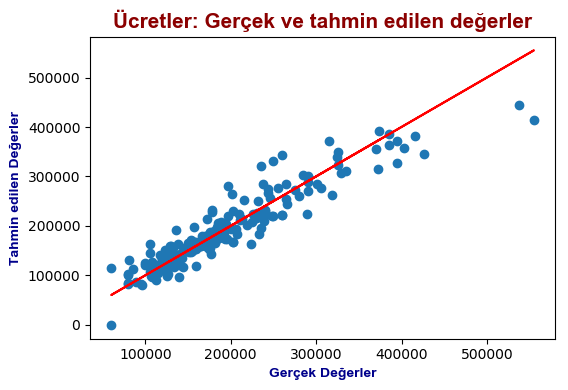

Ortalama Mutlak Hata (MAE)        : 19035.83511773545
Ortalama Kare Hata (MSE)          : 786299257.6133219
Kök Ortalama Kare Hata (RMSE)     : 28041.028112630283
Ortalama Mutlak Yüzde Hata (MAPE) : 10.784073446090124


In [54]:
X_test = sm.add_constant(X_test)
y_preds = sonuclar.predict(X_test)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

2. metodla

In [60]:
Y = emlak['SalePrice']
X = son_liste2
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
tahmin = lrm.predict(X)
hatalar = Y - tahmin

In [61]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 4.92081092e+12  4.92081096e+12  4.92081096e+12  4.92081096e+12
  4.92081095e+12 -1.60664681e+04  2.73305359e+03  1.33467644e+04
 -1.32729492e+01  1.31509436e+04  8.08953979e+03 -1.31772195e+04
 -7.34964561e+03 -7.11586792e+02 -1.47370351e+04 -4.14875514e+04
 -2.96804165e+04 -2.57004678e+04 -2.18163121e+04 -1.03722776e+04
  1.79390280e+04  5.84352303e+04  6.74191901e+04 -9.14186296e+03
  3.77981854e+03  3.19979355e+03  2.16226640e+03  4.83894566e+03
  1.85823181e+02  5.89634430e+02 -5.61438647e+03  1.01324660e+04
 -8.26805859e+03  4.43111656e+02 -2.30753087e+03  1.92486882e+04
 -1.15142821e+04 -6.30457737e+02 -7.10394130e+03 -4.12500098e+03
  1.84265386e+04 -4.45510284e+03 -9.84640479e+03 -6.83369202e+03
  6.83369336e+03  1.91515419e+04 -8.64704788e+03 -4.12725293e+03
 -6.37725705e+03  1.77441139e+04  2.27683053e+04  4.55507271e+04
 -8.60631430e+04  5.75470123e+02  1.08784668e+03 -1.66333374e+03
 -1.97089266e+04 -1.26892678e+04  1.23820487e+04  2.00161390e+04
  5.757246

In [62]:
import statsmodels.api as sm
X3 = sm.add_constant(X)

sonuclar3 = sm.OLS(Y, X3).fit()
sonuclar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     103.4
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        00:14:34   Log-Likelihood:                -12914.
No. Observations:                1094   AIC:                         2.594e+04
Df Residuals:                    1037   BIC:                         2.623e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.194e+05    4.2e+04     -2.841      0.005   -2.02e+05   -3.69e+04
C (all)      -5.572e+04   1.35e+04     -4.132      0.000   -8.22e+04   -2.93e+04
FV           -9872.6858   1.06e+04     -0.935      0.350   -3.06e+04    1.08e+04
RH           -1.284e+04   1.28e+04     -1.001      0.317    -3.8e+04    1.23e+04
RL            -1.55e+04   9523.673     -1.628      0.104   -3.42e+04    3184.296
RM           -2.547e+04   9180.729     -2.775      0.006   -4.35e+04   -7457.455
Bnk          -4.592e+04   1.14e+04     -4.039      0.000   -6.82e+04   -2.36e+04
HLS          -2.712e+04   1.17e+04     -2.326      0.020      -5e+04   -4239.915
Low           -1.65e+04   1.28e+04     -1.290      0.197   -4.16e+04    8606.151
Lvl          -2.987e+04   1.11e+04     -2.689      0.007   -5.17e+04   -8070.738
1Fam         -1.073e+04   8685.064     -1.236      0.217   -2.78e+04    6311.190
2fmCon       -1.579e+04   1.08e+04     -1.467      0.143   -3.69e+04    5331.142
Duplex       -3.706e+04   1.06e+04     -3.506      0.000   -5.78e+04   -1.63e+04
Twnhs        -3.123e+04   1.06e+04     -2.945      0.003    -5.2e+04   -1.04e+04
TwnhsE       -2.459e+04   9467.939     -2.598      0.010   -4.32e+04   -6015.660
2            -2.801e+04   2.34e+04     -1.196      0.232    -7.4e+04     1.8e+04
3            -5.475e+04   1.23e+04     -4.446      0.000   -7.89e+04   -3.06e+04
4            -4.295e+04   7013.262     -6.124      0.000   -5.67e+04   -2.92e+04
5            -3.897e+04   6451.663     -6.040      0.000   -5.16e+04   -2.63e+04
6            -3.508e+04   6316.761     -5.554      0.000   -4.75e+04   -2.27e+04
7            -2.364e+04   6542.963     -3.613      0.000   -3.65e+04   -1.08e+04
8             4671.6927   6974.549      0.670      0.503   -9014.146    1.84e+04
9             4.517e+04   8972.662      5.034      0.000    2.76e+04    6.28e+04
10            5.415e+04   1.22e+04      4.456      0.000    3.03e+04     7.8e+04
BrkCmn       -3.899e+04    1.4e+04     -2.780      0.006   -6.65e+04   -1.15e+04
BrkFace      -2.607e+04   1.08e+04     -2.406      0.016   -4.73e+04   -4810.093
None         -2.665e+04   1.06e+04     -2.510      0.012   -4.75e+04   -5817.327
Stone        -2.769e+04   1.13e+04     -2.457      0.014   -4.98e+04   -5571.226
Ex           -2.501e+04   1.29e+04     -1.941      0.053   -5.03e+04     274.928
Fa           -2.967e+04   1.52e+04     -1.953      0.051   -5.95e+04     148.196
Gd           -2.926e+04   1.14e+04     -2.565      0.010   -5.16e+04   -6876.863
TA           -3.547e+04    1.1e+04     -3.219      0.001   -5.71e+04   -1.38e+04
Ex           -1.972e+04   2.16e+04     -0.911      0.363   -6.22e+04    2.28e+04
Fa           -3.812e+04   1.38e+04     -2.768      0.006   -6.51e+04   -1.11e+04
Gd           -2.941e+04   1.27e+04     -2.321      0.021   -5.43e+04   -4541.500
TA   

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train2.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test2.shape[0]))

Eğitim kümesindeki gözlem sayısı : 875
Test kümesindeki gözlem sayısı   : 219


In [65]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     74.61
Date:                Tue, 28 May 2019   Prob (F-statistic):          2.24e-281
Time:                        00:17:24   Log-Likelihood:                -10366.
No. Observations:                 875   AIC:                         2.085e+04
Df Residuals:                     818   BIC:                         2.112e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.808e+04   5.07e+04     -1.935      0.053   -1.98e+05    1416.701
C (all)      -5.043e+04   1.58e+04     -3.188      0.001   -8.15e+04   -1.94e+04
FV           -3974.8118   1.27e+04     -0.312      0.755    -2.9e+04     2.1e+04
RH           -1.335e+04   1.47e+04     -0.906      0.365   -4.23e+04    1.56e+04
RL           -1.015e+04   1.16e+04     -0.876      0.381   -3.29e+04    1.26e+04
RM           -2.017e+04   1.09e+04     -1.848      0.065   -4.16e+04    1255.844
Bnk           -4.67e+04   1.35e+04     -3.472      0.001   -7.31e+04   -2.03e+04
HLS           -2.23e+04   1.39e+04     -1.600      0.110   -4.96e+04    5051.883
Low          -4796.9219   1.56e+04     -0.308      0.759   -3.54e+04    2.58e+04
Lvl          -2.428e+04   1.34e+04     -1.818      0.069   -5.05e+04    1933.251
1Fam         -5889.1586   1.04e+04     -0.567      0.571   -2.63e+04    1.45e+04
2fmCon       -1.514e+04   1.25e+04     -1.214      0.225   -3.96e+04    9341.617
Duplex       -3.014e+04   1.25e+04     -2.407      0.016   -5.47e+04   -5566.180
Twnhs        -2.732e+04    1.3e+04     -2.100      0.036   -5.29e+04   -1784.256
TwnhsE       -1.959e+04   1.14e+04     -1.720      0.086   -4.19e+04    2763.175
2            -3.531e+04   3.53e+04     -1.000      0.318   -1.05e+05     3.4e+04
3             -5.06e+04   1.43e+04     -3.536      0.000   -7.87e+04   -2.25e+04
4            -3.996e+04   8845.697     -4.517      0.000   -5.73e+04   -2.26e+04
5            -3.663e+04   8081.071     -4.532      0.000   -5.25e+04   -2.08e+04
6            -3.353e+04   7977.146     -4.204      0.000   -4.92e+04   -1.79e+04
7            -2.186e+04   8224.135     -2.657      0.008    -3.8e+04   -5712.212
8             7686.6383   8703.374      0.883      0.377   -9396.939    2.48e+04
9              5.69e+04   1.11e+04      5.138      0.000    3.52e+04    7.86e+04
10            5.521e+04    1.5e+04      3.674      0.000    2.57e+04    8.47e+04
BrkCmn       -3.503e+04   1.72e+04     -2.037      0.042   -6.88e+04   -1276.436
BrkFace      -1.926e+04   1.32e+04     -1.462      0.144   -4.51e+04    6593.501
None         -2.012e+04    1.3e+04     -1.553      0.121   -4.56e+04    5314.503
Stone        -2.367e+04   1.37e+04     -1.732      0.084   -5.05e+04    3152.965
Ex           -3.275e+04   1.52e+04     -2.160      0.031   -6.25e+04   -2995.079
Fa           -1.045e+04   1.96e+04     -0.535      0.593   -4.88e+04    2.79e+04
Gd           -2.432e+04   1.35e+04     -1.800      0.072   -5.08e+04    2204.508
TA           -3.056e+04    1.3e+04     -2.342      0.019   -5.62e+04   -4951.550
Ex           -9928.4478   2.38e+04     -0.417      0.677   -5.67e+04    3.68e+04
Fa           -3.156e+04   1.59e+04     -1.980      0.048   -6.28e+04    -274.031
Gd           -2.574e+04   1.49e+04     -1.727      0.085    -5.5e+04    3517.023
TA   

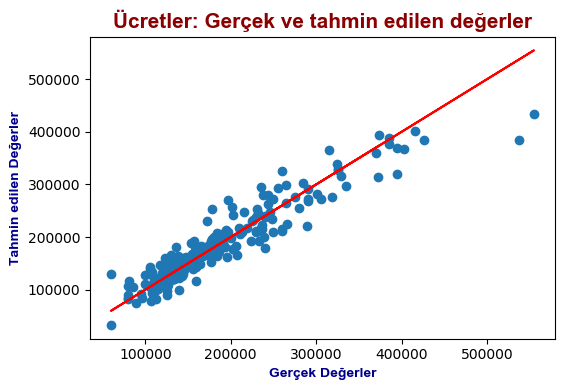

Ortalama Mutlak Hata (MAE)        : 19031.672195389237
Ortalama Kare Hata (MSE)          : 761017041.2144939
Kök Ortalama Kare Hata (RMSE)     : 27586.537318309704
Ortalama Mutlak Yüzde Hata (MAPE) : 10.827880875158368


In [66]:
X_test2 = sm.add_constant(X_test2)
y_preds2 = sonuclar.predict(X_test2)


baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test2, y_preds2)
plt.plot(y_test2, y_test2, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test2, y_preds2)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test2, y_preds2)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test2, y_preds2)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test2 - y_preds2) / y_test2)) * 100))

##varsayım 1 ve varsayım 2

1. ve 2. varsayım uyguladığım fonksiyonla garanti altına alınmıştır.

## varsayım 3

In [ ]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Her iki testin p değerleri 0.05'ten düşüktür. bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

## Varsayım 4

In [ ]:
X.corr()

In [ ]:

liste_columns=Corr_X.columns.tolist()
liste=[i for i in range(102)]
yeni_sözlük=zip(liste,liste_columns)
yeni_sözlük=list(yeni_sözlük)
yeni_sözlük[0][1]
yeni_sözlük

In [ ]:
for i in range(101):
    for j in range(101):
        if(j>i):
            if(Corr_X.iloc[i+1:i+2,j+1:j+2].iloc[0,0] > 0.65)&(Corr_X.iloc[i+1:i+2,j+1:j+2].iloc[0,0] < 1):
                print("i=",(i+1),"j=",(j+1))
                print(yeni_sözlük[i+1][1],yeni_sözlük[j+1][1])
                #print(Corr_X.iloc[i+1:i+2,j+1:j+2].iloc[0,0])
                

## Varsayım 5

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

hatalar arasındaki otokorelasyon -0,06 ile 0,06 arasındadır.

## Varsayım 6

## Sıcaklık Tahmını sorusu

In [ ]:
weather = pd.read_csv('weatherHistory.csv')
weather.head(10)

In [ ]:
weather=weather.drop(['Formatted Date','Summary','Precip Type','Visibility (km)','Loud Cover','Daily Summary'],axis=1)

In [ ]:
weather.info()

In [ ]:
trace = go.Scatter(
    x = weather['Temperature (C)'],
    y = weather['Apparent Temperature (C)'] ,
    mode = 'markers'
)

data = [trace]

py.iplot(data, filename='basic-scatter')


Grafikte de iki sıcaklık degerinin dogrusallıgı gozukuyor o yuzden sadece bir tanesini target yapacagım.

In [ ]:
weather=weather.drop(['Apparent Temperature (C)'],axis=1)

In [ ]:
weather.isnull().sum()*100/weather.shape[0]

In [ ]:
from sklearn import linear_model

Y=weather['Temperature (C)']
X=weather.drop(['Temperature (C)'],axis=1)

lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(X,Y)

tahmin = lrm_ornek.predict(X)
hatalar = Y - tahmin

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

## varsayım 3

In [ ]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Her iki testin p değerleri 0.05'ten düşüktür. bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

## Varsayım 4

In [ ]:
X.corr()

## Varsayım 5

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

# 2 metodun test kumeleriyle degerlerı

## 1. metod

* R-squared:	0.855
* Adj. R-squared:	0.841
* F-statistic:	59.31
* Prob (F-statistic):	2.99e-281
* AIC:	2.079e+04
* BIC:	2.117e+04


* Ortalama Mutlak Hata (MAE)        : 19035.83511773545
* Ortalama Kare Hata (MSE)          : 786299257.6133219
* Kök Ortalama Kare Hata (RMSE)     : 28041.028112630283
* Ortalama Mutlak Yüzde Hata (MAPE) : 10.784073446090124

## 2. metod

* R-squared:	0.836
* Adj. R-squared:	0.825
* F-statistic:	74.61
* Prob (F-statistic):	2.24e-281
* AIC:	2.085e+04
* BIC:	2.112e+04

* Ortalama Mutlak Hata (MAE)        : 19031.672195389237
* Ortalama Kare Hata (MSE)          : 761017041.2144939
* Kök Ortalama Kare Hata (RMSE)     : 27586.537318309704
* Ortalama Mutlak Yüzde Hata (MAPE) : 10.827880875158368